# Bite Data in Louisville, KY(1985-2017)
- What domesticated species bites humans the most?

- Do they bite at an alarming rate compared to over species?

- If we can identify the species, what about the breed?

- Most common human part that gets bitten?

Content:

Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

    bite_date: The date the bite occurred
    SpeciesIDDesc: The species of animal that did the biting
    BreedIDDesc: Breed (if known)
    GenderIDDesc: Gender (of the animal)
    color: color of the animal
    vaccination_yrs: how many years had passed since the last vaccination
    vaccination_date: the date of the last vaccination
    victim_zip: the zipcode of the victim
    AdvIssuedYNDesc: whether advice was issued
    WhereBittenIDDesc: Where on the body the victim was bitten
    quarantine_date: whether the animal was quarantined
    DispositionIDDesc: whether the animal was released from quarantine
    headsentdate: the date the animal’s head was sent to the lab
    release_date: the date the animal was released
    ResultsIDDesc: results from lab tests (for rabies)


In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st


In [199]:
df = pd.read_csv('Health_AnimalBites.csv')
df.head()


,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [200]:
df.shape

(9003, 15)

In [201]:
((df.isnull()).sum() * 100 / df.index.size).round(2)

bite_date             3.52
SpeciesIDDesc         1.31
BreedIDDesc          58.25
GenderIDDesc         28.06
color                28.62
vaccination_yrs      58.48
vaccination_date     54.29
victim_zip           20.42
AdvIssuedYNDesc      71.51
WhereBittenIDDesc     6.84
quarantine_date      77.56
DispositionIDDesc    82.95
head_sent_date       95.61
release_date         83.95
ResultsIDDesc        82.86
dtype: float64

## Deleting columns

We can see that our dataset contains a lot of missing values. We should delete columns that are misssing a significant number of data points or are not relevant to our study. 

Delete columns:
    - AdvIssuedYNDesc, quarantine_date, DispositionIDDesc, head_sent_date, and release_date have over 70% of the datapoints missing. 
     - vaccination_yrs and vaccination_date is not relevant to our study

Althought, ResultIDDesc is missing a majority of its data, we know that animals with rabbies tend to be more aggresive which can result in bites. 

In [202]:
df = df.drop(df.columns[[5,6,7,10,11,12,13]], axis=1)


# Bites Over Time

Lets verify that our dates are between the years 1985 - 2017. 

In [203]:
df['bite_date'] = df.apply(lambda x: pd.to_datetime(
    x, errors='coerce', format='%Y-%m-%d'))



C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Bite Count')

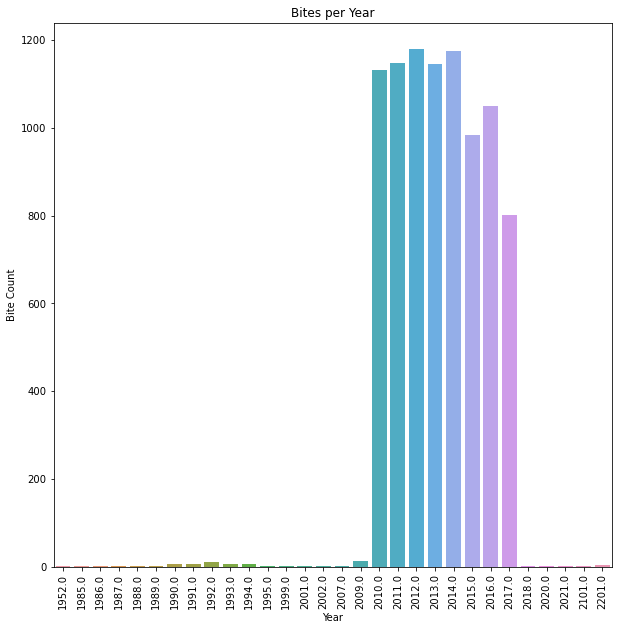

In [204]:
plt.figure(figsize=(10,10))
sns.countplot(df['bite_date'].dt.year)
plt.xticks(rotation=90)
plt.title('Bites per Year')
plt.xlabel('Year')
plt.ylabel('Bite Count')

Using the bar graph above we can conclude that 2012 and 2014 had the highest # of bites. Our dataset doesn't contain many bites reported from 1985 - 2009 compared to 2010 and beyond. Leaves me to believe that the number of humans that encountered or who have an animal was significantly less than it was in 2010 and beyond. 

# Bites per Season

C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Bite Count')

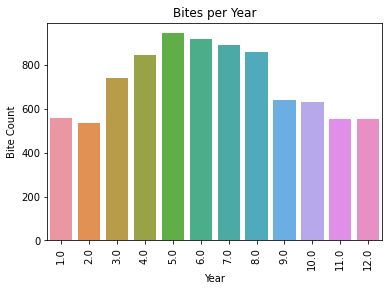

In [205]:
fig, ax =  plt.subplots()
sns.countplot(df['bite_date'].dt.month)
plt.xticks(rotation=90)
plt.title('Bites per Year')
plt.xlabel('Year')
plt.ylabel('Bite Count')


We can see that a majority of the bites occured when the weather is warm. In the US we know that the warmer weather streches from March (3) to the middle of September(9). 

# What animal bites the most?

C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Bite count')

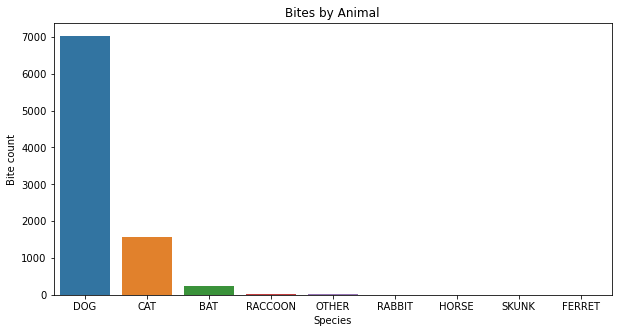

In [206]:
plt.figure(figsize=(10,5))
sns.countplot(df['SpeciesIDDesc'])
plt.title('Bites by Animal')
plt.xlabel('Species')
plt.ylabel('Bite count')

In [207]:
df.SpeciesIDDesc.value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

## Animal bites

From the bar graph above we can see that dogs disproportionately bite more than any other species. With cats and bat far behind in 2nd and 3rd with the most bites. 

# Breed of Dog

C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


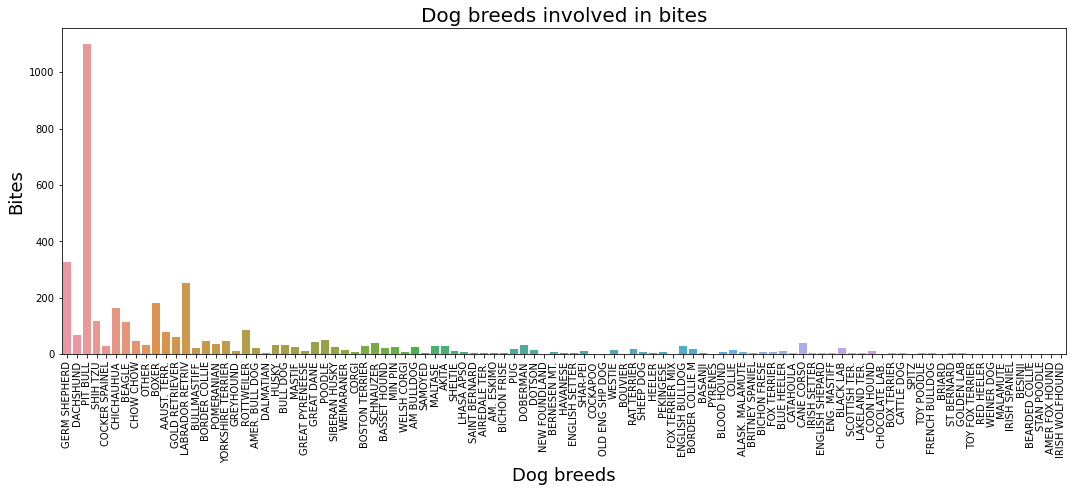

In [208]:
dog_breeds = df.where(df['SpeciesIDDesc'] == "DOG")

plt.figure(figsize=(18,6))
sns.countplot(dog_breeds['BreedIDDesc'])
plt.title("Dog breeds involved in bites", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()


# Top 15 Dogs

C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


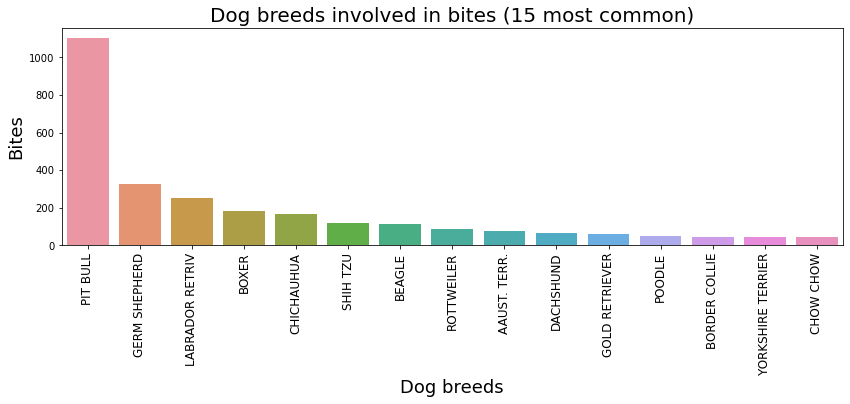

In [209]:
plt.figure(figsize=(14, 4))
sns.countplot(dog_breeds['BreedIDDesc'],
              order=dog_breeds['BreedIDDesc'].value_counts().iloc[0:15].index)
plt.title("Dog breeds involved in bites (15 most common)", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.show()


In [210]:
dog_breeds['BreedIDDesc'].value_counts().iloc[0:15]
dog_breeds.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'AdvIssuedYNDesc', 'WhereBittenIDDesc', 'ResultsIDDesc'],
      dtype='object')

Based on our finding we know that Pitbulls bite more than 3x the amount of German Shepherds and 5x a Labrador. Now, the issue with this data is that a large majority of these animals are not pure breed so we cannot conclude that purebreed Pitbulls will bite as frequently as a mix-breed Pitbull. 

# Bites by Gender


According to some studies gender was found to play a role in the incidents of dog bites. Lets look into that a bit deeper.

C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


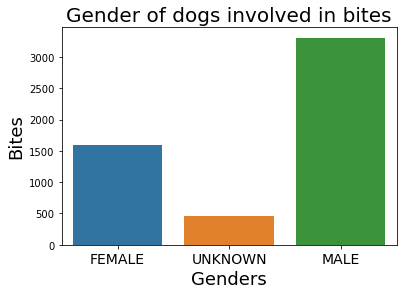

In [211]:
plt.figure(figsize=(6,4))
sns.countplot(dog_breeds['GenderIDDesc'])
plt.title("Gender of dogs involved in bites", fontsize=20)
plt.xlabel('Genders', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


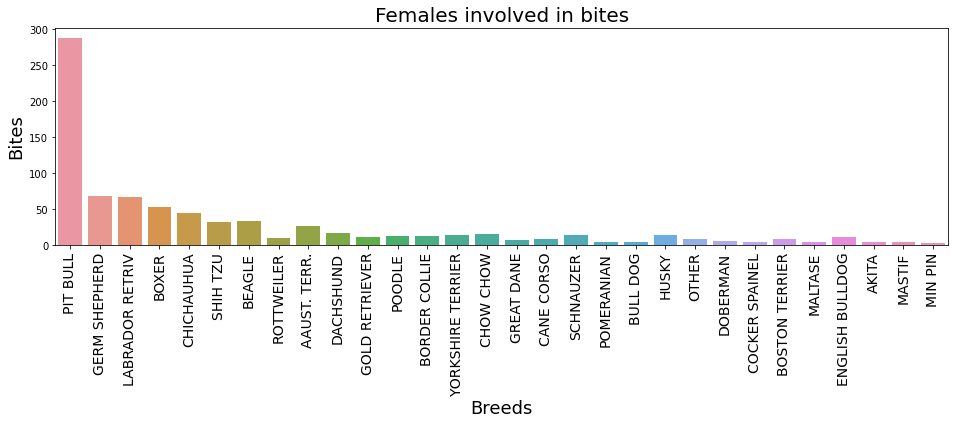

In [212]:

plt.figure(figsize=(16, 4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['GenderIDDesc'] ==
                                              'FEMALE'), order=dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Females involved in bites", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()


C:\Users\luisr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


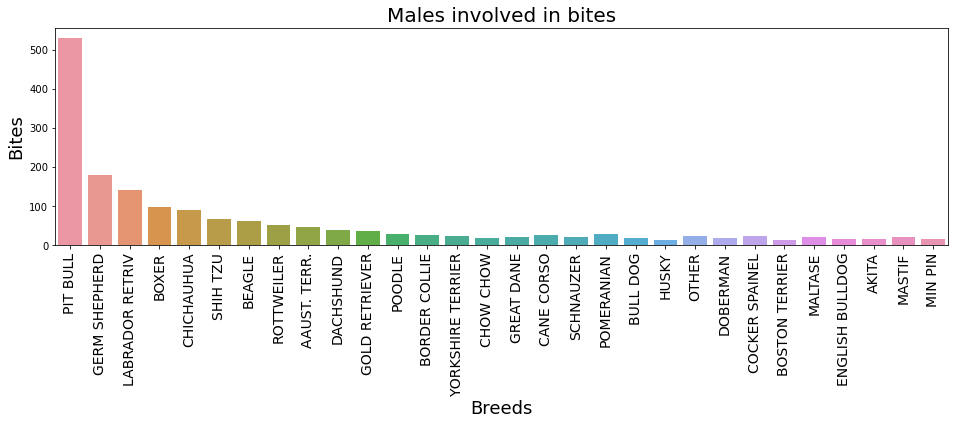

In [213]:
plt.figure(figsize=(16, 4))
sns.countplot(dog_breeds['BreedIDDesc'].where(dog_breeds['GenderIDDesc'] ==
                                              'MALE'), order=dog_breeds['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.title("Males involved in bites", fontsize=20)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()


We can see that our findings support other studies that indicate that gender plays a role on bite incidents when it comes to dogs. Male dogs bite more frequently than female dogs across all breeds of dogs. 

# Most Common Area Bitten

In [216]:
print("Where people were bitten by dogs")
dog_breeds['WhereBittenIDDesc'].value_counts()


Where people were bitten by dogs


BODY       4909
HEAD       1184
UNKNOWN     637
Name: WhereBittenIDDesc, dtype: int64

Our description of the location where a person was bitten is too broad to make any conclusions. But, it does make sense that most of the bites happen on the body.

# Rabbies Results

In [215]:
print("Rabies test results after dog bites")
dog_breeds['ResultsIDDesc'].value_counts()


Rabies test results after dog bites


UNKNOWN     979
NEGATIVE     58
POSITIVE      1
Name: ResultsIDDesc, dtype: int64

We have 1 confirmed case where a dog tested positive for rabbies. But, almost 1000 reports have no data which can influence the number of bite reports since studies have shown that animals with rabbies are more aggresive and therefore can lead to an increase of bites. 

# Conclusions

- The species with the most bite incidents reported were dogs, especifically male dogs. 

- Dogs bit about 7000 times from 1985 - 2017. That is ddisproportionately higher than cat by about 5500 more bites.

- The breed of dog that was associated with the most bites were Pitbulls.

- The body was the most common part bitten by Dogs.